In [89]:
# import sys
# sys.path.extend(['D:\\cppn-tensorflow-master\\cppn-tensorflow-master',
#                  'D:/cppn-tensorflow-master/cppn-tensorflow-master'])
# import os
# 
# os.chdir('D:\\cppn-tensorflow-master\\cppn-tensorflow-master')

%run -i sampler.py

<Figure size 720x720 with 0 Axes>

In [111]:
sampler.cppn.close()
tf.reset_default_graph()
# net_size = [64, 1]
# 6, 8, 8, 8]  ## must have as many elements as num_layers
# net_size = net_size[::-1]
# net_size = [32, 32, 16, 8, 4, 3]
# net_size = [32, 32, 32, 16, 4, 4]
# net_size = [32, 32, 32, 32, 32, 24, 16, 8, 4]

# net_size = [32, 32]
# net_size = np.tile(net_size, 5)

# net_size = [256, 256, 128, 64, 32, 16, 16, 8, 8, 4, 4, 3, 3, 9]
# net_size = [256, 64, 128, 32, 16, 8, 2]

# net_size = [128, 32, 32, 4, 4]  # (makes good pictures with tanh(x^5)
# net_size = [32, 128, 32, 4]
# net_size = np.multiply([32, 512, 64, 32, 32, 8], 0.5)
# net_size = [256, 32, 32, 32, 8, 4]  # (makes good pictures with tanh(x^5)
# net_size = [128, 32, 32, 32, 32, 16, 8, 4]

# net_size = np.concatenate((np.tile([64, 32], 5), [6, 3]))
# net_size = np.tile([7, 6], 8)
# net_size = np.concatenate(([64], net_size))
# a = 2
# b = 2
# c = [a, b]
# net_size = [256, 128] + c + [128, 64] + c + [32, 16] + c
# net_size = [128, 128, 128, 12, 12, 12, 12, 12, 12, 6, 6]

# total_neurons = 500
# num_layers = 20
# w = 0.5
# net_size = []
# for i in range(1, 20):
#     n = 500 / (i ** w) + 20*np.sin(i)**2 + 3
#     # n = i ** w + np.cos(i) + 3
#     # n = np.log10(i)
#     net_size.append(np.round(n))
# net_size = net_size / (np.sum(net_size) / total_neurons)
# net_size = [int(np.round(x)) for x in net_size]
# print(net_size)
seed = 12345678
np.random.seed(seed=seed)

total_neurons = 200
num_layers = 15
omega =  3
alpha = 2
mu = -0.1

net_size = generate_architecture(total_neurons, num_layers, omega, alpha, mu)
print(net_size)

# net_size = [3, 500, 500, 3]

# a = np.tile([128, 64], 1)
# b = np.tile([25, 6], 6)
# net_size = np.concatenate((a, b))

# net_size = np.tile(100, 10)
# net_size = np.concatenate((net_size, net_size))
# net_size=32
num_layers = len(net_size)
c_dim = 3
img_null = tf.zeros((1080, 1080))
sampler = Sampler(z_dim = 16, scale = 8, net_size = net_size, 
                  num_layers=num_layers, c_dim=c_dim, seed=seed, img=img_null)
mgc = get_ipython().magic
mgc(u'matplotlib inline')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Input image is not the same dims as x_mat/y_mat.


[ 6  8 15 17 12  6  9 17 20 14  8 10 20 23 16]


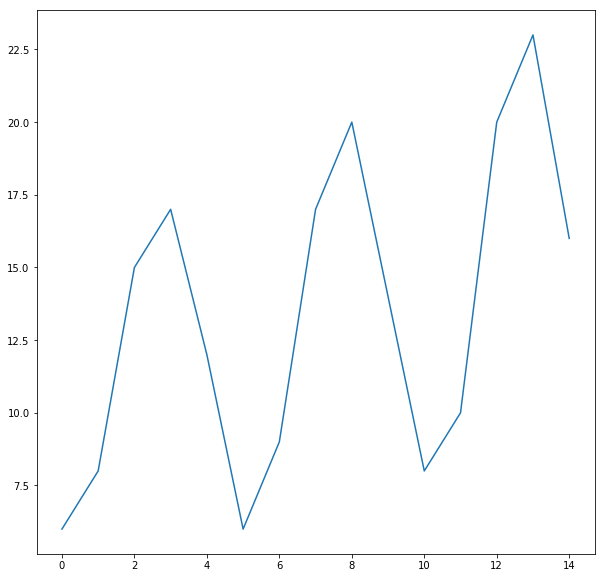

In [110]:
total_neurons = 200
num_layers = 15
omega =  3
alpha = 2
mu = -0.1

net_size = generate_architecture(total_neurons, num_layers, omega, alpha, mu)
print(net_size)
plt.plot(net_size)

Instructions for updating:
Use `tf.variables_initializer` instead.


D:\cppn-tensorflow-master\cppn-tensorflow-master\model.py:173: RuntimeWarning: invalid value encountered in power
  x_mat = np.power(x_mat, w)
D:\cppn-tensorflow-master\cppn-tensorflow-master\model.py:174: RuntimeWarning: invalid value encountered in power
  y_mat = np.power(y_mat, w)


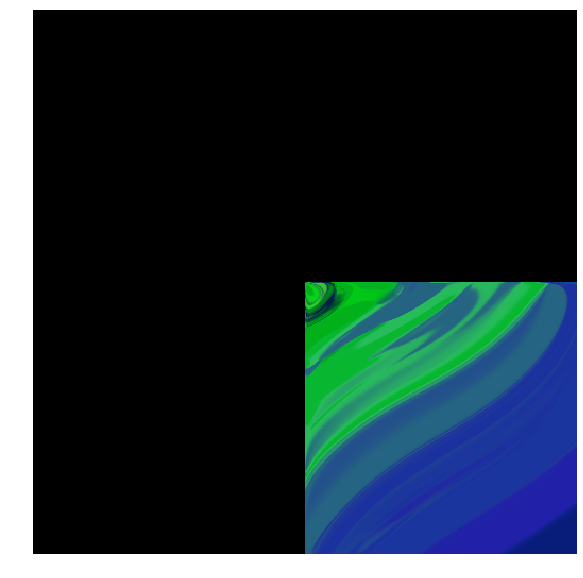

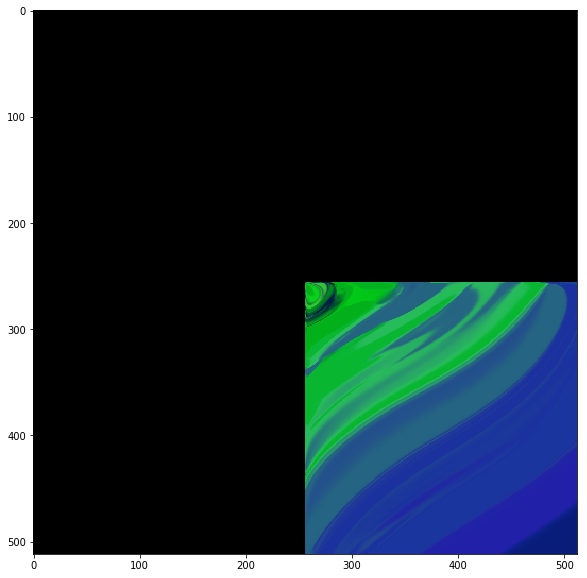

In [3]:
sampler.reinit()
# filename = '../pyramids.png'
# img = imageio.imread(filename)
img = None
z1 = sampler.generate_z()
z1 =  0.1 * z1
# z1 = [0, 0, 0, 0, 0, 0, 0, 0]
f_params = [0.1, 3, 0, 0, 0]
img_data = sampler.generate(z1, x_dim = 512, y_dim = 512, scale = 1,
                            f_params=f_params, img=img)
sampler.show_image(img_data)
plt.imshow(img_data)

[ 0. -0. -0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.]


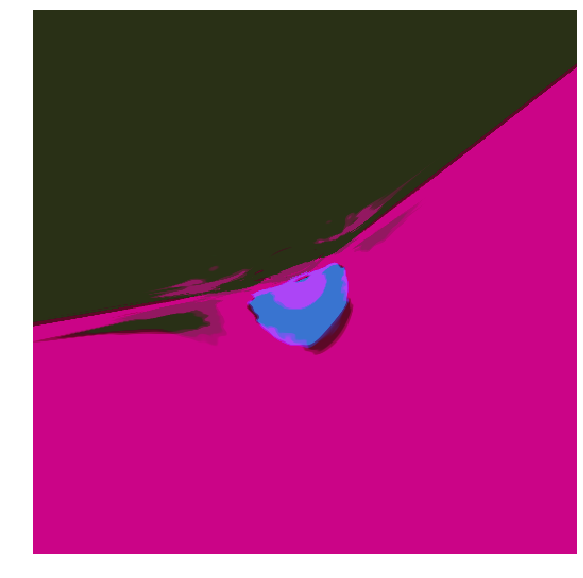

In [312]:
# sampler.reinit()  
z2 = sampler.generate_z()[0]
img = None

z_scale = 0
z_factor = np.random.normal(size=16) * z_scale

sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))

z_factor = z_factor[sortidx]
z2 = z2[sortidy]


zz = z2 * z_factor 
print(zz)
# 
f_params = [15, 0, 0, 0, 0]

img_data = sampler.generate(zz, x_dim = 512, y_dim = 512, scale = 3,
                            f_params=f_params, img=img)
sampler.show_image(img_data)
# plt.imshow(img_data)

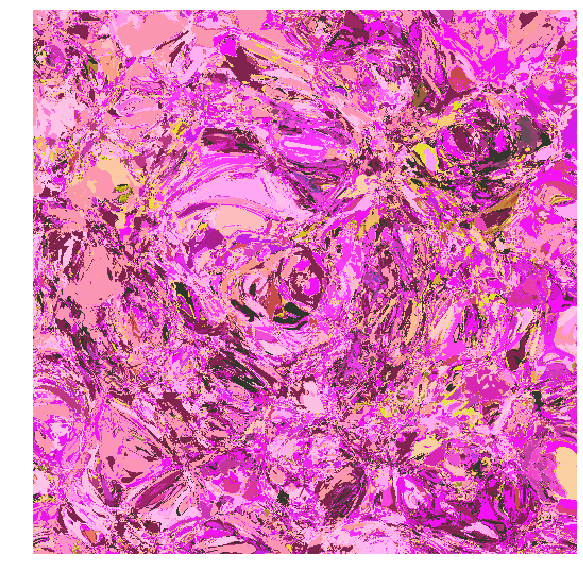

In [180]:
# z2 = [0, 0, 0.1, 0.1, 0, 0, 0, 0]
z3 = sampler.generate_z()
img = None

low = np.random.random()
mid = np.random.random()
high = np.random.random()

C = np.random.uniform()
zz2 = np.concatenate((C + low * z3[0:4], mid * z3[4:12], high * z3[12:16]))
# f_params = [2, 0.2, 0, 0, 0]

img_data = sampler.generate(zz2, x_dim = 512, y_dim = 512, scale = 10, 
                            f_params=f_params, img=img)
sampler.show_image(img_data)
plt.imshow(img_data)

Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 


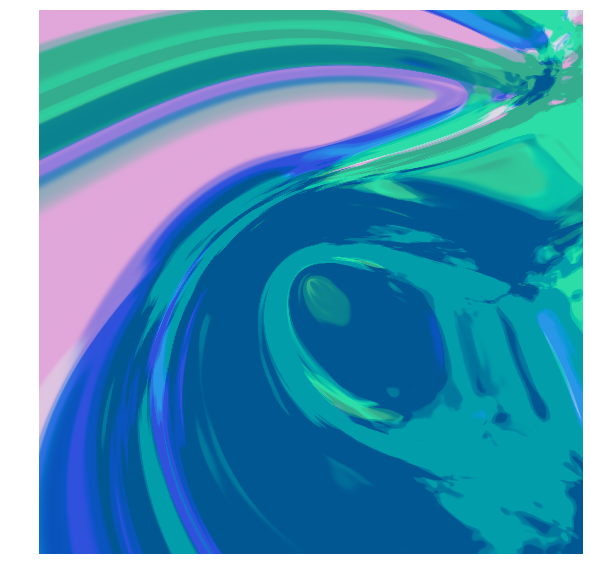

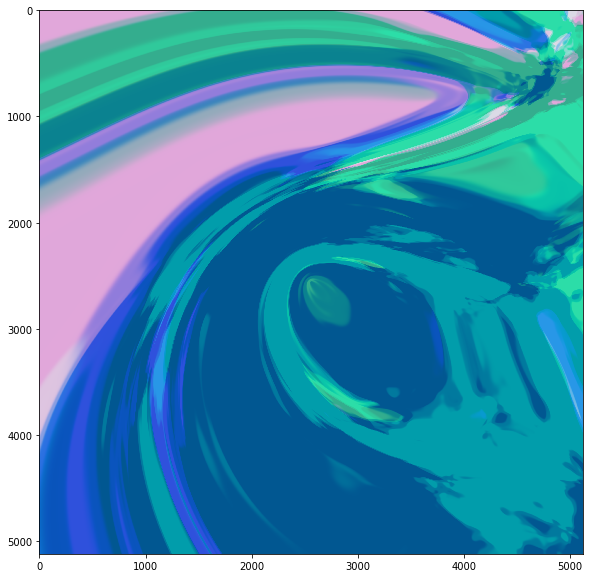

In [219]:
img_data = sampler.generate_hires([zz], res=512, x_res_factor=10, y_res_factor=10,
                                  scale=1, f_params=f_params, img=img)
sampler.show_image(img_data)
plt.imshow(img_data)
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/hi_res/'
if not path.exists(folder):
    makedirs(folder)
figname = folder + time + '.png'
# sampler.save_png(img_data, figname)
imageio.imwrite(figname, (img_data * 255).astype(np.uint8), format='png')

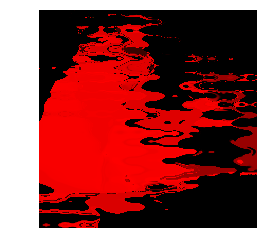

In [12]:
f_params = sampler.generate_f_params()
sampler.show_image(sampler.generate(z1, x_dim = 1080, y_dim=1080, scale = 8, f_params = f_params))

In [1]:
x = sampler.generate(z1, x_dim=512, y_dim=512)
import matplotlib.pyplot as plt
plt.hist(x.reshape(1, x.size))

NameError: name 'sampler' is not defined

In [2]:
# z1 = sampler.generate_z()
z2 = sampler.generate_z()
img_data = sampler.generate(z2, x_dim=640, y_dim=640, scale=10, 
                                    f_params=f_params, img=img)
sampler.show_image(img_data)
# plt.imshow(img_data)



NameError: name 'sampler' is not defined

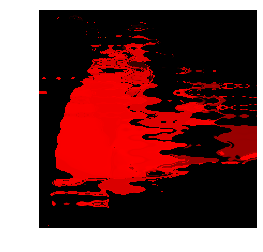

In [16]:
sampler.show_image(sampler.generate(z1, x_dim=1080, y_dim=1080, f_params=f_params))

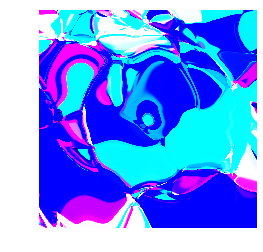

In [23]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
z1 = np.array(z1)
z2 = np.array(z2)
sampler.save_anim_gif(z1, z2, figname, 
                      x_dim = 640, y_dim = 640, scale=5, f_params=f_params, 
                      n_frame=240, reverse=False, img=img)

processing image  0
processing image  1
processing image  2
processing image  3
processing image  4
processing image  5
processing image  6
processing image  7
processing image  8
processing image  9
processing image  10
processing image  11
processing image  12
processing image  13
processing image  14
processing image  15
processing image  16
processing image  17
processing image  18
processing image  19
processing image  20
processing image  21
processing image  22
processing image  23
processing image  24
processing image  25
processing image  26
processing image  27
processing image  28
processing image  29
processing image  30
processing image  31
processing image  32
processing image  33
processing image  34
processing image  35
processing image  36
processing image  37
processing image  38
processing image  39
processing image  40
processing image  41
processing image  42
processing image  43
processing image  44
processing image  45
processing image  46
processing image  47
pr

In [716]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_anim_gif(zz, 0.025, figname, 
                      x_dim = 640, y_dim = 640, scale=10, f_params=f_params, 
                      n_frame=240, reverse=False, img=None)

processing image  0
processing image  1
processing image  2
processing image  3
processing image  4
processing image  5
processing image  6
processing image  7
processing image  8
processing image  9
processing image  10
processing image  11
processing image  12
processing image  13
processing image  14
processing image  15
processing image  16
processing image  17
processing image  18
processing image  19
processing image  20
processing image  21
processing image  22
processing image  23
processing image  24
processing image  25
processing image  26
processing image  27
processing image  28
processing image  29
processing image  30
processing image  31
processing image  32
processing image  33
processing image  34
processing image  35
processing image  36
processing image  37
processing image  38
processing image  39
processing image  40
processing image  41
processing image  42
processing image  43
processing image  44
processing image  45
processing image  46
processing image  47
pr

In [110]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_anim_gif(zz, 0.005, figname, 
                      x_dim = 640, y_dim = 640, scale=0.3, f_params=f_params, 
                      n_frame=340, reverse=False, img=None)

processing image  0
processing image  1
processing image  2
processing image  3
processing image  4
processing image  5
processing image  6
processing image  7
processing image  8
processing image  9
processing image  10
processing image  11
processing image  12
processing image  13
processing image  14
processing image  15
processing image  16
processing image  17
processing image  18
processing image  19
processing image  20
processing image  21
processing image  22
processing image  23
processing image  24
processing image  25
processing image  26
processing image  27
processing image  28
processing image  29
processing image  30
processing image  31
processing image  32
processing image  33
processing image  34
processing image  35
processing image  36
processing image  37
processing image  38
processing image  39
processing image  40
processing image  41
processing image  42
processing image  43
processing image  44
processing image  45
processing image  46
processing image  47
pr

In [5]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_cat_anim_gif(z1=zz[0], r_global=0.1, filename=figname, 
                      x_dim = 640, y_dim = 640, scale=1.5, f_params=f_params, 
                      n_frame=360, reverse=False, img=None)

processing image  0
processing image  1
processing image  2
processing image  3
processing image  4
processing image  5
processing image  6
processing image  7
processing image  8
processing image  9
processing image  10
processing image  11
processing image  12
processing image  13
processing image  14
processing image  15
processing image  16
processing image  17
processing image  18
processing image  19
processing image  20
processing image  21
processing image  22
processing image  23
processing image  24
processing image  25
processing image  26
processing image  27
processing image  28
processing image  29
processing image  30
processing image  31
processing image  32
processing image  33
processing image  34
processing image  35
processing image  36
processing image  37
processing image  38
processing image  39
processing image  40
processing image  41
processing image  42
processing image  43
processing image  44
processing image  45
processing image  46
processing image  47
pr

In [7]:
audiopath = 'media/muy-tranquilo-short3.mp3'
acceleration = False
exp_gain = 2.5
w_scaler = 1
f_amp_w = True
normalize_w = False

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
sampler.save_music_anim_gif(zz, r_global=0.015, audiopath=audiopath, filename=figname,
                            x_dim = 640, y_dim = 640, scale=1, f_params=f_params,
                            n_frame=322, img=None,
                            acceleration=acceleration, 
                            exp_gain=exp_gain, w_scaler=w_scaler,
                            normalize_w=normalize_w, 
                            f_amp_w=f_amp_w)

processing image  0
processing image  1
processing image  2
processing image  3
processing image  4
processing image  5
processing image  6
processing image  7
processing image  8
processing image  9
processing image  10
processing image  11
processing image  12
processing image  13
processing image  14
processing image  15
processing image  16
processing image  17
processing image  18
processing image  19
processing image  20
processing image  21
processing image  22
processing image  23
processing image  24
processing image  25
processing image  26
processing image  27
processing image  28
processing image  29
processing image  30
processing image  31
processing image  32
processing image  33
processing image  34
processing image  35
processing image  36
processing image  37
processing image  38
processing image  39
processing image  40
processing image  41
processing image  42
processing image  43
processing image  44
processing image  45
processing image  46
processing image  47
pr

In [17]:
audiopath = 'media/muy-tranquilo-short3.mp3'
sound, fs = sampler.load_sound(audiopath)
amp = sampler.generate_amp(sound, fs, 30)
amp = sampler.smooth_amps(amp, a=0.9)
# amp_sums = np.sum(amp, 0)
# amp = (amp) / amp_sums  # normalize to add to 2*pi for each band so gif loops
# freq = [1, 2, 3, 4, 5, 7, 10, 12]
# rand_freq1 = sample(freq, len(freq))
# # rand_freq1 = sample(freq, len(freq))
# amp = rand_freq1 * np.tile(2 * np.pi, amp.shape[1]) * amp

In [18]:
amp.shape

(322, 8)

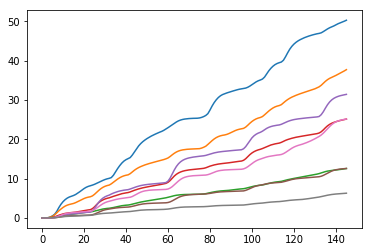

In [13]:
audiopath = 'high.mp3'
sound, fs = sampler.load_sound(audiopath)
amp = sampler.generate_amp(sound, fs, 30)
theta1,theta2 = sampler.calculate_force_thetas(amp)

r1, r2 = 1, 1
delta_z1 = r1 * np.sin(theta1) - r1/2
delta_z2 = r2 * np.cos(theta2) - r2/2

plt.plot(np.diff(theta1, 0))

In [35]:
from os import path, makedirs
z_zoom = zz
num_frames = 540
res = 512
r_global = 0.005
w_scaler = 1
exp_gain = 1
acceleration = False
audiopath = 'mozart25_short.mp3'

start_scale = 0.5
end_scale = 10

def calculate_delta_z(sampler, z1, r_global, audiopath, n_frame=10, 
                      start_scale, end_scale,
                      acceleration=False, exp_gain=1, fps=30, w_scaler=2):
    total_frames = n_frame
    fps = fps
    sound, fs = sampler.load_sound(audiopath)
    amp = sampler.generate_amp(sound, fs, fps)[0:total_frames]

    z1 = z1[0]
    r = z1 / np.max(np.abs(z1))
    r = r * r_global

    #  CALCULATE delta_z
    if acceleration:
        gamma = 20  # damping constant
        thresh = 20  # threshold audio
        num_pad = 3  #  number of padding elements (zeros) to re-align delta_theta with beats

        theta1, theta2 = sampler.calculate_force_thetas(amp=amp, exp_gain=exp_gain, gamma=gamma, w_scaler=w_scaler,
                                                        num_pad=num_pad, thresh=thresh)
        total_frames += num_pad
    else:
        theta1, theta2 = sampler.calculate_thetas(amp=amp, exp_gain=exp_gain, w_scaler=w_scaler)

    delta_z1 = np.sin(theta1)
    delta_z2 = np.cos(theta2)
    
    scale = 10 ** \
        (-1 * np.linspace(-np.log10(start_scale), -np.log10(end_scale), num_frames_new)

    delta_z = []
    for i in range(delta_z1.shape[0]):
        delta_z.append(np.stack([x for t in zip(delta_z1[i, :], delta_z2[i, :]) for x in t]))
    delta_z = np.stack(delta_z)
    delta_z = np.multiply(r, delta_z) - r / 2
    delta_z = np.multiply(delta_z, scale)

    return delta_z

delta_z = calculate_delta_z(sampler=sampler, z1=z_zoom, r_global=r_global, 
                            audiopath=audiopath, n_frames=num_frames, 
                            start_scale=start_scale, end_scale=end_scale)
# delta_z = sampler.calculate_delta_z(z_zoom, r_global, audiopath, num_frames)

num_frames_new = delta_z.shape[0]
# scale = 10 ** \
#         (-1 * np.linspace(-np.log10(start_scale), -np.log10(end_scale), num_frames_new))

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/zoom_anim/' + time
if not path.exists(time):
    makedirs(folder)

for i in range(num_frames_new):
    z_new = z_zoom + delta_z[i, :]

    img_data = sampler.generate(z_new, x_dim=res, y_dim=res, scale=scale[i],
                                f_params=f_params, img=img)
    print('processing image ', i)

    figname = folder + '/' + time + '-' + str(i).zfill(4) + '.png'
    imageio.imwrite(figname, (img_data * 255).astype(np.uint8), format='png')


In [70]:
from os import path, makedirs
num_frames = 500
scale = 2 * 10 ** (np.linspace(-1, 1, num_frames))

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/zoom_anim/' + time
if not path.exists(time):
    makedirs(folder)

for i in range(num_frames):

    img_data = sampler.generate(zz, x_dim = 1280, y_dim = 1280, scale = scale[i],
                                f_params=f_params, img=img)
    figname = folder + '/' + time + '-' + str(i).zfill(4) + '.png'
    
    sampler.save_png(img_data, figname)

ResourceExhaustedError: OOM when allocating tensor with shape[1638400,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node g_0_f0_366/MatMul (defined at D:\cppn-tensorflow-master\cppn-tensorflow-master\ops.py:34)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Reshape_3299, g_0_f0/Matrix/read)]]

Current usage from device: /job:localhost/replica:0/task:0/device:GPU:0, allocator: GPU_0_bfc
  200.00MiB from g_0_z_366/mul
  200.00MiB from g_tanh_0_366/mul
  200.00MiB from g_tanh_1_366/mul
  200.00MiB from g_tanh_2_366/mul
  200.00MiB from g_0_y_366/MatMul
  200.00MiB from g_0_x_366/MatMul
  200.00MiB from g_0_f2_366/MatMul
  200.00MiB from g_0_r_366/MatMul
  200.00MiB from g_0_z_366/MatMul
  200.00MiB from g_0_f1_366/MatMul
  100.00MiB from g_tanh_3_366/mul
  50.00MiB from g_tanh_4_366/mul
  25.00MiB from g_tanh_5_366/mul
  25.00MiB from g_final_366/mul
  Remaining 6 nodes with 14.8KiB

	 [[{{node Reshape_3302/_5855}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_193_Reshape_3302", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Current usage from device: /job:localhost/replica:0/task:0/device:GPU:0, allocator: GPU_0_bfc
  200.00MiB from g_0_z_366/mul
  200.00MiB from g_tanh_0_366/mul
  200.00MiB from g_tanh_1_366/mul
  200.00MiB from g_tanh_2_366/mul
  200.00MiB from g_0_y_366/MatMul
  200.00MiB from g_0_x_366/MatMul
  200.00MiB from g_0_f2_366/MatMul
  200.00MiB from g_0_r_366/MatMul
  200.00MiB from g_0_z_366/MatMul
  200.00MiB from g_0_f1_366/MatMul
  100.00MiB from g_tanh_3_366/mul
  50.00MiB from g_tanh_4_366/mul
  25.00MiB from g_tanh_5_366/mul
  25.00MiB from g_final_366/mul
  Remaining 6 nodes with 14.8KiB


Caused by op 'g_0_f0_366/MatMul', defined at:
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\asyncio\base_events.py", line 427, in run_forever
    self._run_once()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\asyncio\base_events.py", line 1440, in _run_once
    handle._run()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-f50ec0c93862>", line 13, in <module>
    f_params=f_params, img=img)
  File "D:\cppn-tensorflow-master\cppn-tensorflow-master\sampler.py", line 76, in generate
    return self.cppn.generate(z, x_dim, y_dim, scale, f_params, img=img)[0]
  File "D:\cppn-tensorflow-master\cppn-tensorflow-master\model.py", line 287, in generate
    G = self.generator(x_dim=x_dim, y_dim=y_dim, reuse=True)
  File "D:\cppn-tensorflow-master\cppn-tensorflow-master\model.py", line 194, in generator
    U += fully_connected(f_unroll[i], net_size[0], 'g_0_f' + str(i), with_bias=False)
  File "D:\cppn-tensorflow-master\cppn-tensorflow-master\ops.py", line 34, in fully_connected
    result = tf.matmul(input_, matrix)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2057, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "D:\Anaconda3\envs\cppn-tensorflow-master\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1638400,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node g_0_f0_366/MatMul (defined at D:\cppn-tensorflow-master\cppn-tensorflow-master\ops.py:34)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Reshape_3299, g_0_f0/Matrix/read)]]

Current usage from device: /job:localhost/replica:0/task:0/device:GPU:0, allocator: GPU_0_bfc
  200.00MiB from g_0_z_366/mul
  200.00MiB from g_tanh_0_366/mul
  200.00MiB from g_tanh_1_366/mul
  200.00MiB from g_tanh_2_366/mul
  200.00MiB from g_0_y_366/MatMul
  200.00MiB from g_0_x_366/MatMul
  200.00MiB from g_0_f2_366/MatMul
  200.00MiB from g_0_r_366/MatMul
  200.00MiB from g_0_z_366/MatMul
  200.00MiB from g_0_f1_366/MatMul
  100.00MiB from g_tanh_3_366/mul
  50.00MiB from g_tanh_4_366/mul
  25.00MiB from g_tanh_5_366/mul
  25.00MiB from g_final_366/mul
  Remaining 6 nodes with 14.8KiB

	 [[{{node Reshape_3302/_5855}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_193_Reshape_3302", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Current usage from device: /job:localhost/replica:0/task:0/device:GPU:0, allocator: GPU_0_bfc
  200.00MiB from g_0_z_366/mul
  200.00MiB from g_tanh_0_366/mul
  200.00MiB from g_tanh_1_366/mul
  200.00MiB from g_tanh_2_366/mul
  200.00MiB from g_0_y_366/MatMul
  200.00MiB from g_0_x_366/MatMul
  200.00MiB from g_0_f2_366/MatMul
  200.00MiB from g_0_r_366/MatMul
  200.00MiB from g_0_z_366/MatMul
  200.00MiB from g_0_f1_366/MatMul
  100.00MiB from g_tanh_3_366/mul
  50.00MiB from g_tanh_4_366/mul
  25.00MiB from g_tanh_5_366/mul
  25.00MiB from g_final_366/mul
  Remaining 6 nodes with 14.8KiB



In [13]:
tf.global_variables_initializer()

<tf.Operation 'init_4' type=NoOp>